## [Practice 1] DMS
* 0. 실습 환경 설정
* 1. 데이터셋 전처리하기
* 2. 얼굴 비율함수 정의하기
* 4. Inference

### 0. 학습 환경 설정
* 가상환경명 : p8
* Python 버전 : python 3.8
* 설치 목록
    * !pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html
    * opencv_python==4.1.0.25
    * tensorboardX==1.8
    * scipy
* Retinaface Git 주소 : https://github.com/biubug6/Pytorch_Retinaface
* PFLD Git 주소 : https://github.com/polarisZhao/PFLD-pytorch

* 이용자의 눈 비율 (ER) 측정
* 눈 비율 (ER) limit 값 계산
* 얼굴 검출 

* TODO : 첨부파일 중 project_dms 다운로드

### 1. 데이터셋 전처리하기
### 1-1. 파일명에서 한글 삭제

* TODO : 경로 이동 (project_dms root 로 이동)

In [ ]:
cd

* TODO : AI-HUB `졸음운전 예방을 위한 운전자 상태 정보 영상` 에서 다운로드 [링크](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=173)
    * 선택 다운로드 : validation/[원천]bbox(통제환경).zip

In [2]:
import os
import shutil

light = ['무광원', '정면광원', '좌측광원', '우측광원', '후면광원']  # 3
location = ['계기판', '네비게이션', '룸미러', '썬바이저', '정면', '좌사이드미러', '우사이드미러'] # 4
status = ['정상주시', '졸음재현', '하품재현', '통화재현'] #5

* TODO : 경로 입력
    * `root_folder` : {dataset root}/045_G1 경로 입력
    * `change_folder` : {project_dms root}/testimg 경로 입력

In [3]:
root_folder = 
change_folder = 

if not os.path.exists(change_folder):
      os.makedirs(change_folder)

file_list = os.listdir(root_folder)
for file in file_list:
  name, ext = file.split('.')
  p = name.split("_")
  p[3] = str(light.index(p[3]))
  p[4] = str(location.index(p[4]))
  p[5] = str(status.index(p[5]))
  new_name = "_".join(p) + '.' + ext
  shutil.copyfile(os.path.join(root_folder, file), os.path.join(change_folder, new_name))

### 2. 얼굴 비율 함수 정의하기
* EAR
* Stir Rate
* Head Rate

* TODO : 경로 이동 (project_dms root 로 이동)

In [ ]:
cd

In [4]:
from scipy.spatial import distance as dist

In [5]:
def ear(pts):
    A = dist.euclidean(pts[1],pts[7])
    B = dist.euclidean(pts[3],pts[5])
    C = dist.euclidean(pts[0],pts[4])
    return (A+B) / (2.0*C)

In [6]:
def head_rate(pts):
    A = dist.euclidean(pts[51],pts[54])
    B = dist.euclidean(pts[54],pts[16])
    return A/B

In [7]:
def stir_rate(pts):
    A = dist.euclidean(pts[4],pts[54])
    B = dist.euclidean(pts[28],pts[54])
    return A/B

In [8]:
def face_metric(pts):
    left_EAR = ear(pts[60:68])
    right_EAR = ear(pts[68:76])
    EAR_avg = (left_EAR + right_EAR)/2
    HR = head_rate(pts)
    SR = stir_rate(pts)
    return EAR_avg, HR, SR

* test

* TODO : practice1과 practice2에서 학습한 가중치 경로 입력하기
    * `face_detection_weight` : practice1 학습 가중치 경로 입력
    * `landmark_detection_weight` : practice2 학습 가중치 경로 입력

In [38]:
import cv2
import sys
import matplotlib.pyplot as plt
sys.path.append('fd')
sys.path.append('fl')

import face_detection
import face_landmark_detection 
landmark_detection_weight = 
face_detection_weight = 

* TODO : 테스트 이미지 다운로드 받아 `test_img_path`에 경로입력

EAR : 0.221, HR : 0.392, SR :  1.144


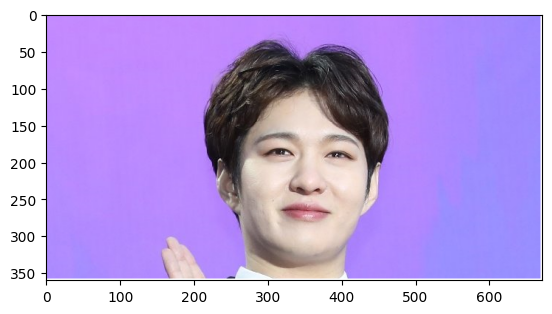

In [40]:
test_img_path = 
test_img = cv2.imread(test_img_path)
dets = face_detection.detection(test_img, face_detection_weight)
points = face_landmark_detection.landmark_detection(test_img, dets[0], landmark_detection_weight)
EAR, HR, SR = face_metric(points)
print(f"EAR : {EAR:.3f}, HR : {HR:.3f}, SR :  {SR:.3f}")
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

### 4. Inference
### 4-1. Import Modules / Hyperparameter

* TODO : 경로 이동 (project_dms root 로 이동)

In [ ]:
cd

In [32]:
# FD를 위한 라이브러리
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import sys
from scipy.spatial import distance as dist
import os

sys.path.append('fd')
sys.path.append('fl')

import face_detection
import face_landmark_detection 

* EAR 경계값은: (open-close)^2 /2 + close보다 작을시 문제
* Head rate 경계값은 : 0.5 ~ 0.95 사이면 문제
* 좌우 경계값은 : 0 .5 ~ 2 사이면 정상

* TODO : practice1과 practice2에서 학습한 가중치 경로 입력하기
    * `face_detection_weight` : practice1 학습 가중치 경로 입력
    * `landmark_detection_weight` : practice2 학습 가중치 경로 입력

In [44]:
landmark_detection_weight = 
face_detection_weight = 
time_th = 0.25
vis_thresh = 0.6
EAR_Thresh = 0.2        # 이것보다 작으면 문제
HR_Thresh = (0.5, 0.95) # 이구간만 문제
SR_Thresh = (0.5, 2)    # 이사이만 정상

* TODO : 경로 입력
    * `root_folder` : {project_dms root}/testimg 경로 입력

In [54]:
root_folder = 
result_folder = 'result'
if not os.path.exists(result_folder):
      os.makedirs(result_folder)

In [55]:
# 변수 초기화
ear_status = False
head_status = False
face_detection_n = False
ear_status_warning = False
head_status_warning = False
face_detection_n_warning = False
fd_time = 0
head_time = 0
ear_time = 0

file_list = os.listdir(root_folder)
for idx, file in enumerate(file_list):

    # test image 읽어오기
    img = cv2.imread(os.path.join(root_folder, file))
    
    # Face detection 진행
    dets = face_detection.detection(img, face_detection_weight)
    cr = time.time()
    if len(dets) == 0 and dets[0][4] < vis_thresh: # 전방 미주시
        if face_detection_n == False:
            fd_time = cr
            face_detection_n = True
        if face_detection_n == True and cr- fd_time >time_th:
            face_detection_n_warning = True
            if face_detection_n_warning :
                cv2.rectangle(img, (0,0), (300, 100), (255,0,0), -1, cv2.LINE_AA)  # filled
                cv2.putText(img, 'Warning!', (5,70),cv2.FONT_HERSHEY_DUPLEX, 2,(255,255,255), thickness=3, lineType=cv2.LINE_AA)
        cv2.imwrite(f'result/m_{idx:04d}.png', cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        continue

    face_detection_n = False
    face_detection_n_warning = False

    # Face Lanmark Detection 진행 및 EAR, HR, SR 계산
    points = face_landmark_detection.landmark_detection(img, dets[0], landmark_detection_weight)
    EAR, HR, SR = face_metric(points)

    # EAR 이상 확인
    if EAR < EAR_Thresh:
        cr = time.time()
        if ear_status == False:
            ear_time = cr
            ear_status = True
        if ear_status == True and cr - ear_time >time_th:
            ear_status_warning = True
    else:
        ear_status = False
        ear_status_warning = False

    # 고개 이상 확인
    if (HR_Thresh[0] <HR and HR < HR_Thresh[1]) or (SR < SR_Thresh[0] and SR_Thresh[1] < SR):
        cr = time.time()
        if head_status == False:
            head_time = cr
            head_status = True
        if head_status == True and cr - head_time >time_th:
            head_status_warning = True
    else:
        head_status = False
        head_status_warning = False

    # 졸음 감지 되면 출력
    if ear_status_warning or head_status_warning:
        cv2.rectangle(img, (0,0), (300, 100), (255,0,0), -1, cv2.LINE_AA)  # filled
        cv2.putText(img, 'Warning!', (5,70),cv2.FONT_HERSHEY_DUPLEX, 2,(255,255,255), thickness=3, lineType=cv2.LINE_AA)

    cv2.putText(img, f'EAR:{EAR:.2f} ', (600,100),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(img, f'SR:{SR:.2f}', (600,150),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.putText(img, f'HR:{HR:.2f}', (600,200),cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.imwrite(f'result/m_{idx:04d}.png', cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

* 한장씩 테스트 진행

In [ ]:
# test image 읽어오기
img = cv2.imread(os.path.join(root_folder, file))

# Face detection 진행
dets = face_detection.detection(img, face_detection_weight)
cr = time.time()
if len(dets) == 0 and dets[0][4] < vis_thresh: # 전방 미주시
    if face_detection_n == False:
        fd_time = cr
        face_detection_n = True
    if face_detection_n == True and cr- fd_time >time_th:
        face_detection_n_warning = True
        if face_detection_n_warning :
            cv2.rectangle(img, (0,0), (300, 100), (255,0,0), -1, cv2.LINE_AA)  # filled
            cv2.putText(img, 'Warning!', (5,70),cv2.FONT_HERSHEY_DUPLEX, 2,(255,255,255), thickness=3, lineType=cv2.LINE_AA)
    cv2.imwrite(f'result/m_{idx:04d}.png', cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    continue

face_detection_n = False
face_detection_n_warning = False

# Face Lanmark Detection 진행 및 EAR, HR, SR 계산
points = face_landmark_detection.landmark_detection(img, dets[0], landmark_detection_weight)
EAR, HR, SR = face_metric(points)

# EAR 이상 확인
if EAR < EAR_Thresh:
    cr = time.time()
    if ear_status == False:
        ear_time = cr
        ear_status = True
    if ear_status == True and cr - ear_time >time_th:
        ear_status_warning = True
else:
    ear_status = False
    ear_status_warning = False

# 고개 이상 확인
if (HR_Thresh[0] <HR and HR < HR_Thresh[1]) or (SR < SR_Thresh[0] and SR_Thresh[1] < SR):
    cr = time.time()
    if head_status == False:
        head_time = cr
        head_status = True
    if head_status == True and cr - head_time >time_th:
        head_status_warning = True
else:
    head_status = False
    head_status_warning = False

# 졸음 감지 되면 출력
if ear_status_warning or head_status_warning:
    cv2.rectangle(img, (0,0), (300, 100), (255,0,0), -1, cv2.LINE_AA)  # filled
    cv2.putText(img, 'Warning!', (5,70),cv2.FONT_HERSHEY_DUPLEX, 2,(255,255,255), thickness=3, lineType=cv2.LINE_AA)